# How to make a winning portfolio with the epic Black-Litterman approach

The Black-Litterman model is a mathematical tool for portfolio allocation. It was developed in 1990 by Fischer Black and Robert Litterman at Goldman Sachs.

The Black-Litterman model takes a Bayesian approach to asset allocation. Specifically, it combines a prior estimate of returns with views on certain assets, to produce a posterior estimate of expected returns.

It starts with an asset allocation based on the equilibrium assumption, which suggests that assets will perform in the future as they have in the past. The model then modifies this initial allocation by considering the investor’s views on future asset performance.

Black-Litterman incorporates subjective views into market equilibrium returns providing a more personalized approach to asset allocation.

In [3]:
# Imports and set up

# We’ll use PyPortfolioOpt to construct the Black-Litterman portfolio weights. We’ll also use the OpenBB SDK for data and seaborn for plotting.

import numpy as np

from pypfopt.black_litterman import BlackLittermanModel
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import plotting

from openbb_terminal.sdk import openbb
import seaborn as sns
sns.set_theme()
# Let’s grab some prices

prices = openbb.economy.index(["AAPL", "BBY", "BAC", "SBUX", "T"])

# Set up the Black-Litterman model

The Black-Litterman model supports absolute or relative views. Absolute views are statements like: “AAPL will return 20%” or “BBY will drop 40%”. Relative views, on the other hand, are statements like “GOOG will outperform FB by 3%.”

In [4]:
# This issue covers absolute views.

viewdict = {
    "AAPL": 0.20, 
    "BBY": 0.25,
    "BAC": 0.10,
    "SBUX": 0.2,
    "T": 0.15
}

cov_matrix = risk_models.sample_cov(prices)
# These views are passed to PyPortfolioOpt in the form of a Python dictionary. Each symbol is mapped to an absolute return. Then, we create a sample covariance matrix.

<AxesSubplot:xlabel='Volatility', ylabel='Return'>

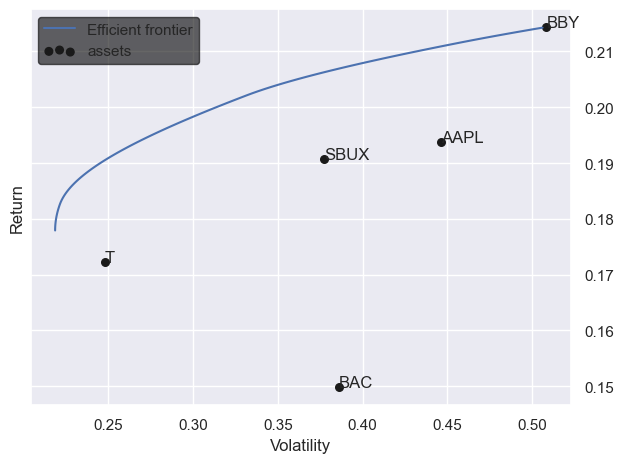

In [5]:
# These views are passed to PyPortfolioOpt in the form of a Python dictionary. Each symbol is mapped to an absolute return. Then, we create a sample covariance matrix.

# Finally, we’re ready to set up the Black-Litterman model.

bl = BlackLittermanModel(
cov_matrix,
absolute_views=viewdict,
pi="equal"
)

rets = bl.bl_returns()
ef = EfficientFrontier(rets, cov_matrix)
weights = bl.bl_weights()

plotting.plot_efficient_frontier(ef, show_tickers=True)

The pi argument is the estimate of the priors. You can think of the prior as the “default” estimate, in the absence of any information. Black and Litterman provide the insight that a natural choice for this prior is the market’s estimate of the return, which is embedded into the market capitalization of the asset.

We can use whatever priors we want. PyPortfolioOpt has a built-in option equal-weighted priors, so we’ll use that.

From there, we generate the returns and build an efficient frontier using the default return optimization.